## Model Training

#### 1.1 Import Data and Required Packages
##### Importing Pandas, Numpy, Matplotlib, Seaborn and Warings Library.

In [24]:
# Basic Import
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns
# Modelling
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor,AdaBoostRegressor, GradientBoostingRegressor
from sklearn.svm import SVR
from sklearn.linear_model import LinearRegression, Ridge,Lasso
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
from sklearn.model_selection import RandomizedSearchCV
from catboost import CatBoostRegressor
from xgboost import XGBRegressor
import warnings

#### Import the CSV Data as Pandas DataFrame

In [3]:
df = pd.read_csv('data/raw.csv')

#### Show Top 5 Records

In [4]:
df.head()

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


#### Preparing X and Y variables

In [28]:
df[df.reading_score.max()]

KeyError: 100

In [5]:
X = df.drop(columns=['math_score'],axis=1)

In [6]:
X.head()

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,reading_score,writing_score
0,female,group B,bachelor's degree,standard,none,72,74
1,female,group C,some college,standard,completed,90,88
2,female,group B,master's degree,standard,none,95,93
3,male,group A,associate's degree,free/reduced,none,57,44
4,male,group C,some college,standard,none,78,75


In [7]:
print("Categories in 'gender' variable:     ",end=" " )
print(df['gender'].unique())

print("Categories in 'race_ethnicity' variable:  ",end=" ")
print(df['race_ethnicity'].unique())

print("Categories in'parental level of education' variable:",end=" " )
print(df['parental_level_of_education'].unique())

print("Categories in 'lunch' variable:     ",end=" " )
print(df['lunch'].unique())

print("Categories in 'test preparation course' variable:     ",end=" " )
print(df['test_preparation_course'].unique())

Categories in 'gender' variable:      ['female' 'male']
Categories in 'race_ethnicity' variable:   ['group B' 'group C' 'group A' 'group D' 'group E']
Categories in'parental level of education' variable: ["bachelor's degree" 'some college' "master's degree" "associate's degree"
 'high school' 'some high school']
Categories in 'lunch' variable:      ['standard' 'free/reduced']
Categories in 'test preparation course' variable:      ['none' 'completed']


In [8]:
y = df['math_score']

In [9]:
y

0      72
1      69
2      90
3      47
4      76
       ..
995    88
996    62
997    59
998    68
999    77
Name: math_score, Length: 1000, dtype: int64

In [10]:
# Create Column Transformer with 3 types of transformers
num_features = X.select_dtypes(exclude="object").columns
cat_features = X.select_dtypes(include="object").columns

from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer

numeric_transformer = StandardScaler()
oh_transformer = OneHotEncoder()

preprocessor = ColumnTransformer(
    [
        ("OneHotEncoder", oh_transformer, cat_features),
         ("StandardScaler", numeric_transformer, num_features),        
    ]
)

In [11]:
X = preprocessor.fit_transform(X)

In [12]:
X.shape

(1000, 19)

In [13]:
X.shape

(1000, 19)

In [14]:
# separate dataset into train and test
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=42)
X_train.shape, X_test.shape

((800, 19), (200, 19))

#### Create an Evaluate Function to give all metrics after model Training

In [15]:
def evaluate_model(true, predicted):
    mae = mean_absolute_error(true, predicted)
    mse = mean_squared_error(true, predicted)
    rmse = np.sqrt(mean_squared_error(true, predicted))
    r2_square = r2_score(true, predicted)
    return mae, rmse, r2_square

In [16]:
models = {
    "Linear Regression": LinearRegression(),
    "Lasso": Lasso(),
    "Ridge": Ridge(),
    "K-Neighbors Regressor": KNeighborsRegressor(),
    "Decision Tree": DecisionTreeRegressor(),
    "Random Forest Regressor": RandomForestRegressor(),
    "XGBRegressor": XGBRegressor(), 
    # "CatBoosting Regressor": CatBoostRegressor(verbose=False),
    "AdaBoost Regressor": AdaBoostRegressor()
}
model_list = []
r2_list =[]

for i in range(len(list(models))):
    model = list(models.values())[i]
    model.fit(X_train, y_train) # Train model

    # Make predictions
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)
    
    # Evaluate Train and Test dataset
    model_train_mae , model_train_rmse, model_train_r2 = evaluate_model(y_train, y_train_pred)

    model_test_mae , model_test_rmse, model_test_r2 = evaluate_model(y_test, y_test_pred)

    
    print(list(models.keys())[i])
    model_list.append(list(models.keys())[i])
    
    print('Model performance for Training set')
    print("- Root Mean Squared Error: {:.4f}".format(model_train_rmse))
    print("- Mean Absolute Error: {:.4f}".format(model_train_mae))
    print("- R2 Score: {:.4f}".format(model_train_r2))

    print('----------------------------------')
    
    print('Model performance for Test set')
    print("- Root Mean Squared Error: {:.4f}".format(model_test_rmse))
    print("- Mean Absolute Error: {:.4f}".format(model_test_mae))
    print("- R2 Score: {:.4f}".format(model_test_r2))
    r2_list.append(model_test_r2)
    
    print('='*35)
    print('\n')

Linear Regression


Model performance for Training set
- Root Mean Squared Error: 5.3243
- Mean Absolute Error: 4.2671
- R2 Score: 0.8743
----------------------------------
Model performance for Test set
- Root Mean Squared Error: 5.3960
- Mean Absolute Error: 4.2158
- R2 Score: 0.8803


Lasso
Model performance for Training set
- Root Mean Squared Error: 6.5938
- Mean Absolute Error: 5.2063
- R2 Score: 0.8071
----------------------------------
Model performance for Test set
- Root Mean Squared Error: 6.5197
- Mean Absolute Error: 5.1579
- R2 Score: 0.8253


Ridge
Model performance for Training set
- Root Mean Squared Error: 5.3233
- Mean Absolute Error: 4.2650
- R2 Score: 0.8743
----------------------------------
Model performance for Test set
- Root Mean Squared Error: 5.3904
- Mean Absolute Error: 4.2111
- R2 Score: 0.8806


K-Neighbors Regressor
Model performance for Training set
- Root Mean Squared Error: 5.7077
- Mean Absolute Error: 4.5167
- R2 Score: 0.8555
----------------------------------
Model

### Results

In [17]:
pd.DataFrame(list(zip(model_list, r2_list)), columns=['Model Name', 'R2_Score']).sort_values(by=["R2_Score"],ascending=False)

,Model Name,R2_Score
2,Ridge,0.880593
0,Linear Regression,0.880345
5,Random Forest Regressor,0.851414
7,AdaBoost Regressor,0.849587
6,XGBRegressor,0.827797
1,Lasso,0.825320
3,K-Neighbors Regressor,0.783813
4,Decision Tree,0.752711


## Linear Regression

In [18]:
lin_model = LinearRegression(fit_intercept=True)
lin_model = lin_model.fit(X_train, y_train)
y_pred = lin_model.predict(X_test)
score = r2_score(y_test, y_pred)*100
print(" Accuracy of the model is %.2f" %score)

 Accuracy of the model is 88.03


## Plot y_pred and y_test

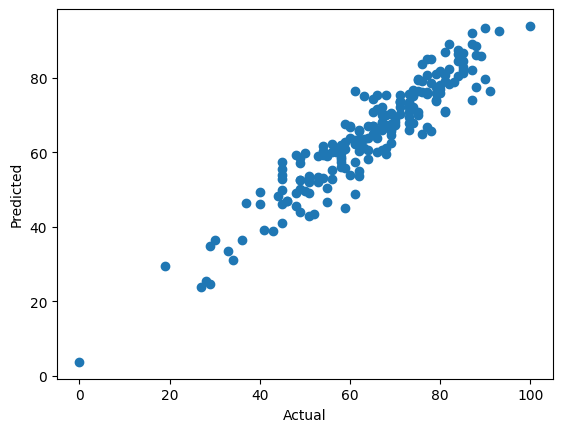

In [19]:
plt.scatter(y_test,y_pred);
plt.xlabel('Actual');
plt.ylabel('Predicted');

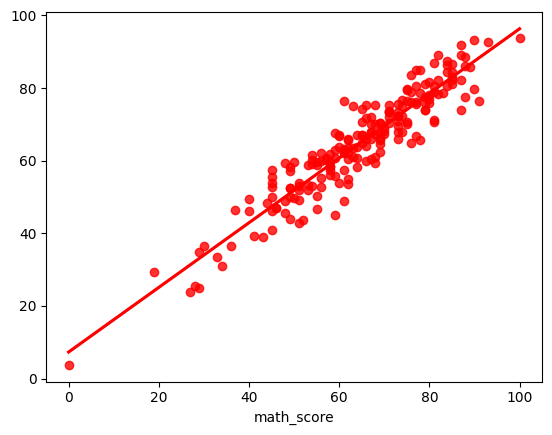

In [20]:
sns.regplot(x=y_test,y=y_pred,ci=None,color ='red');

#### Difference between Actual and Predicted Values

In [21]:
pred_df=pd.DataFrame({'Actual Value':y_test,'Predicted Value':y_pred,'Difference':y_test-y_pred})
pred_df

,Actual Value,Predicted Value,Difference
521,91,76.507812,14.492188
737,53,58.953125,-5.953125
740,80,76.960938,3.039062
660,74,76.757812,-2.757812
411,84,87.539062,-3.539062
...,...,...,...
408,52,43.546875,8.453125
332,62,62.031250,-0.031250
208,74,67.976562,6.023438
613,65,67.132812,-2.132812


In [25]:
model_params = {
                "Random_Forest":{
                    "model":RandomForestRegressor(),
                    "params":{
                        "n_estimators": [100, 200, 500, 1000],
                        "criterion": ["squared_error", "absolute_error", "poisson"],
                        "max_features": ["auto", "sqrt", "log2", 0.5, 0.75]
                    }
                },
                "Decision_Tree":{
                    "model":DecisionTreeRegressor(),
                    "params":{
                        "criterion": ["squared_error", "friedman_mse", "absolute_error", "poisson"],
                        "splitter": ["best", "random"],
                        "max_features": [None, "auto", "sqrt", "log2", 0.5, 0.75]
                    }
                },
                "Gradient_Boosting":{
                    "model":GradientBoostingRegressor(),
                    "params":{
                        "loss": ["squared_error", "absolute_error", "huber", "quantile"],
                        "learning_rate": [0.01, 0.05, 0.1, 0.2],
                        "n_estimators": [100, 200, 500, 1000],
                        "subsample": [1.0, 0.8, 0.6, 0.4],
                        "criterion": ["friedman_mse", "squared_error"],
                        "max_features": [None, "auto", "sqrt", "log2", 0.5, 0.75]
                    }
                },
                "Linear_Regression":{
                    "model":LinearRegression(),
                    "params":{
                    }
                },
                "XG_Boosting":{
                    "model":XGBRegressor(),
                    "params":{
                        "n_estimators": [100, 200, 500, 1000], 
                        "learning_rate": [0.01, 0.05, 0.1, 0.2, 0.3],
                    }
                },
                "KNN":{
                    "model":KNeighborsRegressor(),
                    "params":{
                        "n_neighbors":[3,5,7,9,11,13],
                        "weights":["uniform",'distance'],
                        "p":[1,2]
                    }
                },
                "Cat_Boost":{
                    "model":CatBoostRegressor(),
                    "params":{
                        "iterations": [100, 500, 1000, 2000], 
                        "learning_rate": [0.01, 0.05, 0.1, 0.2, 0.3], 
                        "depth": [4, 6, 8, 10, 12]
                    }
                },
                "AdaBoost":{
                    "model":AdaBoostRegressor(),
                    "params":{
                        "n_estimators": [50, 100, 200, 500],
                        "learning_rate": [0.01, 0.05, 0.1, 0.5, 1.0],
                        "loss": ["linear", "square", "exponential"],
                    
                    }
                }
            }

In [26]:
scores = []
        


for model_name, mp in model_params.items():
    my_model = mp["model"]
    print(my_model)
    clf = RandomizedSearchCV(mp["model"],mp["params"], cv = 5, return_train_score= False)
    clf.fit(X_train,y_train)
    scores.append({
        "model" : model_name,
        "best_score" : clf.best_score_,
        "best_params": clf.best_params_
    })
            
           

RandomForestRegressor()


e:\Personal Files\Learning Programming\Data Science\Projects\PredictScore\venv\Lib\site-packages\sklearn\model_selection\_validation.py:540: FitFailedWarning: 
5 fits failed out of a total of 50.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
5 fits failed with the following error:
Traceback (most recent call last):
  File "e:\Personal Files\Learning Programming\Data Science\Projects\PredictScore\venv\Lib\site-packages\sklearn\model_selection\_validation.py", line 888, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "e:\Personal Files\Learning Programming\Data Science\Projects\PredictScore\venv\Lib\site-packages\sklearn\base.py", line 1466, in wrapper
    estimator._validate_params()
  File "e:\Personal Files\

DecisionTreeRegressor()
GradientBoostingRegressor()
LinearRegression()
XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=None, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)


e:\Personal Files\Learning Programming\Data Science\Projects\PredictScore\venv\Lib\site-packages\sklearn\model_selection\_search.py:320: UserWarning: The total space of parameters 1 is smaller than n_iter=10. Running 1 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


KNeighborsRegressor()
0:	learn: 12.2361043	total: 93.4ms	remaining: 46.6s
1:	learn: 10.2946007	total: 93.9ms	remaining: 23.4s
2:	learn: 9.1428421	total: 94.4ms	remaining: 15.6s
3:	learn: 8.2382765	total: 94.9ms	remaining: 11.8s
4:	learn: 7.4801189	total: 95.3ms	remaining: 9.44s
5:	learn: 6.9310677	total: 95.8ms	remaining: 7.89s
6:	learn: 6.5078611	total: 96.3ms	remaining: 6.78s
7:	learn: 6.2646965	total: 96.7ms	remaining: 5.95s
8:	learn: 6.1018094	total: 97.1ms	remaining: 5.3s
9:	learn: 5.9663811	total: 97.6ms	remaining: 4.78s
10:	learn: 5.8384844	total: 98ms	remaining: 4.35s
11:	learn: 5.7487003	total: 98.5ms	remaining: 4s
12:	learn: 5.6636738	total: 99ms	remaining: 3.71s
13:	learn: 5.6311649	total: 99.6ms	remaining: 3.46s
14:	learn: 5.5625283	total: 100ms	remaining: 3.24s
15:	learn: 5.5175154	total: 101ms	remaining: 3.04s
16:	learn: 5.4722055	total: 101ms	remaining: 2.87s
17:	learn: 5.4348613	total: 101ms	remaining: 2.72s
18:	learn: 5.3983606	total: 102ms	remaining: 2.58s
19:	learn: 

KeyboardInterrupt: 